[[ 184.36056149   31.8906334 ]
 [ 105.64137463   14.85362731]
 [ 104.37565572  107.05582285]
 [  63.17383336   54.41559683]
 [ 141.20223582   50.94266763]]
[[ 209.63333333   67.63333333]
 [  97.83333333   15.        ]
 [ 113.0952381   118.69047619]
 [  46.35294118   65.26470588]
 [ 149.11111111   68.94444444]]
[[ 214.17857143   77.07142857]
 [  93.18181818   19.90909091]
 [ 112.11764706  120.11764706]
 [  43.45454545   74.54545455]
 [ 150.75         68.45833333]]
[[ 215.33333333   78.07407407]
 [  84.           27.57142857]
 [ 113.90909091  119.75757576]
 [  41.74193548   79.77419355]
 [ 153.72         65.8       ]]
[[ 216.53846154   78.69230769]
 [  79.05         34.85      ]
 [ 115.41176471  119.67647059]
 [  38.11538462   85.92307692]
 [ 156.66666667   63.25      ]]
[[ 216.53846154   78.69230769]
 [  77.95833333   40.        ]
 [ 117.78125     120.40625   ]
 [  35.66666667   91.125     ]
 [ 156.66666667   63.25      ]]
[[ 216.53846154   78.69230769]
 [  76.96153846   42.15384615]
 [

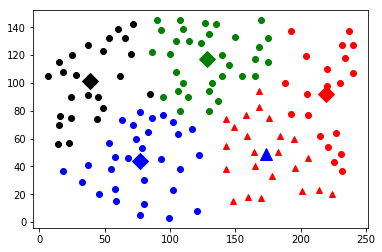

In [42]:
#coding=utf-8
from numpy import *
import numpy as np
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        #print(curLine)
        #fltLine = map(float, curLine)
        #dataMat.append(fltLine)
        dataMat.append([float(curLine[0]), float(curLine[1])])  
    return dataMat
    
#计算两个向量的距离，用的是欧几里得距离
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

#随机生成初始的质心（ng的课说的初始方式是随机选K个点）    
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(array(dataSet)[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids
    
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment
    
def show(dataSet, k, centroids, clusterAssment):
    from matplotlib import pyplot as plt  
    numSamples, dim = dataSet.shape  
    if dim != 2:  
        print "Sorry! I can not draw because the dimension of your data is not 2!"  
        return 1 
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print "Sorry! Your k is too large! please contact Zouxy"  
        return 1  
    for i in xrange(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
    plt.show()
  
'''     
#键值对式序列化库
PICKLE_PATH='./softfits.pick'
import shelve
def set_pickle(k='temp',v=''):
    with shelve.open(PICKLE_PATH) as file:
        file[k]=v

def get_pickle(k):
    if k is None:
        return False
    with shelve.open(PICKLE_PATH) as file:
        try:
            v=file[k]
        except KeyError:
            return None
        else:
            return v

'''



def main():
    '''    
    img=np.load('./posfit.npy')
    print(img.shape)
    #res=kMeans(img,1, distMeas=distEclud, createCent=randCent)
    myCentroids, clustAssing= kMeans(img,1)
    print myCentroids
    show(img, 1, myCentroids, clustAssing)  
    '''
    #dataMat = mat(loadDataSet('testSet2.txt'))
    k=5
    #dataMat = mat(loadDataSet('./K-means聚类数据/Test_data.txt'))
    dataMat = np.load(r'C:\Users\Administrator\Desktop\E\jiedian.npy')
    myCentroids, clustAssing= kMeans(dataMat,k)
    print myCentroids
    show(dataMat, k, myCentroids, clustAssing)  
    return clustAssing
    
    
if __name__ == '__main__':
   clustAssing = main()

In [43]:
clustAssing=np.array(clustAssing)    

In [44]:
ji=np.zeros(5)
for li in clustAssing:
    if li[0]==0:
        ji[0]+=1
    if li[0]==1:
        ji[1]+=1
    if li[0]==2:
        ji[2]+=1
    if li[0]==3:
        ji[3]+=1
    if li[0]==4:
        ji[4] += 1

In [45]:
ji

array([ 20.,  30.,  33.,  24.,  23.])